# Black friday 

In [1]:
import numpy as np
import pandas as pd

In [20]:
black_f = pd.read_csv('BlackFriday.csv')

In [21]:
black_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Uncover interesting insights about your dataset

In [22]:
black_f.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [24]:
black_f.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [25]:
black_f.head (10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# Data Cleaning 
- Change all the types into category or numerical

In [27]:
black_f['City_Category'] = black_f['City_Category'].astype('category')
black_f['Product_Category_1'] = black_f['Product_Category_1'].astype('float64')
black_f['Product_Category_2'] = black_f['Product_Category_2'].astype('float64')
black_f['Product_Category_3'] = black_f['Product_Category_3'].astype('float64')


In [28]:
black_f.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                   int64
Product_Category_1             float64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [29]:
black_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null float64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: category(1), float64(3), int64(4), object(4)
memory usage: 45.6+ MB


Usando lamda hago un cambio en la columna de city category donde sustituyo la clasificacion de A,B,C por una numerica 0,1,2

In [10]:
def abc(s): 
    if s == 'A': 
        return 0
    if s == 'B':
        return 1
    if s == 'C':
        return 2

In [40]:
black['city_cat_num'] = black_f['City_Category'].apply(lambda x: abc(x))
black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,1.2.3,category_num,city_cat_num
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969,2,2,2
5,1000003,P00193542,M,26-35,15,A,3,0,1.0,2.0,NaN,15227,0,0,0
6,1000004,P00184942,M,46-50,7,B,2,1,1.0,8.0,17.0,19215,1,1,1
7,1000004,P00346142,M,46-50,7,B,2,1,1.0,15.0,NaN,15854,1,1,1
8,1000004,P0097242,M,46-50,7,B,2,1,1.0,16.0,NaN,15686,1,1,1
9,1000005,P00274942,M,26-35,20,A,1,1,8.0,NaN,NaN,7871,0,0,0


In [58]:
black['city_cat_num'] = black['city_cat_num'].astype('int64')
black.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                   int64
Product_Category_1             float64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
1.2.3                         category
category_num                  category
city_cat_num                     int64
dtype: object

Mean purchase by age 

In [59]:
avg_purchase = black_f.groupby('Age', as_index=False).agg({'Purchase':'mean'})
avg_purchase.columns = ['Age', 'Avg_Purchase']
avg_purchase

,Age,Avg_Purchase
0,0-17,9020.126878
1,18-25,9235.197575
2,26-35,9314.588970
3,36-45,9401.478758
4,46-50,9284.872277
5,51-55,9620.616620
6,55+,9453.898579


Mean purchase by city category 

In [60]:
avg_city_cat = black.groupby('City_Category', as_index=False).agg({'Purchase':'mean'})
avg_city_cat.columns = ['City_Category', 'Avg_Purchase']
avg_city_cat

,City_Category,Avg_Purchase
0,A,8958.011014
1,B,9198.657848
2,C,9844.441855


New df with the columns that i am going to use

In [64]:
friday = black.filter(['Purchase',], axis=1)
friday.head(10)

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969
5,15227
6,19215
7,15854
8,15686
9,7871


Quiero saber la relacion entre la categoria de producto que se compra en realacion a la categoria de la ciudad, es decir si el hecho de vivir en un ciudad implica comprar un producto de una categoria o otra.

In [51]:
avg_city = friday.groupby('city_cat_num', as_index=False).agg({'Product_Category_1':'mean','Product_Category_2':'mean','Product_Category_3':'mean'})
avg_city.columns = ['city_cat_num', 'Avg_Product_Category_1','Avg_Product_Category_2','Avg_Product_Category_3']
avg_city

,city_cat_num,Avg_Product_Category_1,Avg_Product_Category_2,Avg_Product_Category_3
0,0,5.437036,9.945026,12.682530
1,1,5.300420,9.825763,12.674811
2,2,5.165964,9.779649,12.654322


Missing values 

In [16]:
null_cols = friday.isnull().sum()
null_cols[null_cols > 0]


Product_Category_2    166986
Product_Category_3    373299
dtype: int64

In [43]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e7c0cc0>]],
      dtype=object)

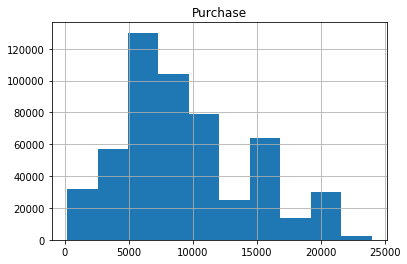

In [65]:
friday.hist()

Llegados a este punto me he dado cuenta que mis variables son categoricas y no puedo hacer ningun tipo de comparacion por lo que voy a añadir otra data con la que trabajar al menos el analisis de correlacion, scatter plot, boxplot e histograma 

# Athletes (data 2)

In [67]:
import numpy as np
import pandas as pd

In [69]:
athletes = pd.read_csv('athlete_events.csv')

In [70]:
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [72]:
athletes.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [73]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [74]:
null_cols = athletes.isnull().sum()
null_cols[null_cols > 0]

Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64

In [77]:
athletes = athletes.filter(['Height','Weight'], axis=1)
athletes.head()

,Height,Weight
0,180.0,80.0
1,170.0,60.0
2,NaN,NaN
3,NaN,NaN
4,185.0,82.0


Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c897b38>,
      dtype=object)

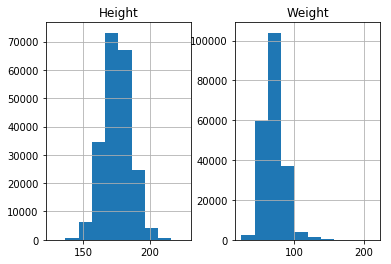

In [78]:
athletes.hist()

Boxplot

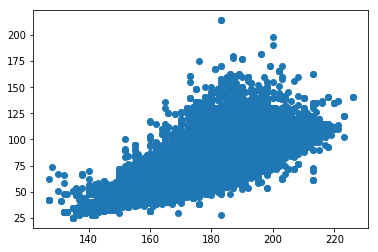

In [80]:
plt.scatter(x=athletes["Height"], y=athletes["Weight"])

In [81]:
athletes.corr(method='spearman')

,Height,Weight
Height,1.000000,0.827131
Weight,0.827131,1.000000


Hay una correlacion fuerte y positiva entre la altura y el peso de los atletas olimpicos